In [1]:
# ARTIFICIAL INTELLIGENCE FOUNDATION (In-Course Assessment)
# STUDENT NAME: EFETOBORE AKPOMEDAYE OGHARA
# STUDENT ID: B1093078


In [2]:
# IMPLEMETATION OF DIJKSTRA’S ALGORITHM TO DETERMINE THE SHORTEST PATH
# AND DISTANCE WITHIN TEESSIDE UNIVERSITY MAIN CAMPUS, MIDDLESBROUGH

In [3]:
# Departmental Buildings with Labels
# Each node (vertex) is labelled alphabetically to represent the names of the selected campus buildings:
# A – Teesside University Central Halls, B – Constantine, C – Stephenson, D – The Printworks, E – Orion, F – Phoenix, 
# G – Waterhouse, H – Aurora, I – Athena, J – The Curve, K – Student Union, L – Europa, M – Centuria, N – Olympia.

In [4]:
# import necessary python libraries modules
 
import numpy as np               # supports multi-dimentional arrays
import matplotlib.pyplot as plt  # for data visualization and graphical ploting
import networkx as nx            # for creation and manipulation of complex networks

In [5]:
G=nx.Graph()     # this command creates an empty undirected graph

# store the nodes and values of weighted vertex in list that contains tuples
E = [("A", "B", 107), ("A", "C", 94), ("A", "D", 90), ("B", "E", 161),("B", "G", 322), ("C", "E", 135),
    ("C", "F", 161), ("D", "F", 108), ("D", "I", 161), ("E", "H", 161),  ("G", "H", 161), ("G", "J", 322), ("G", "K", 322),
    ("F", "I", 121),  ("F", "H", 161), ("I", "L", 161), ("I", "K", 322), ("H", "K", 322), ("J", "K", 161), ("J", "M", 161),
    ("M", "N", 71), ("K", "N", 103), ("K", "L", 322), ("L", "N", 322), ("H", "I", 151)]
G.add_weighted_edges_from(E) # passing the list to the undirected graph

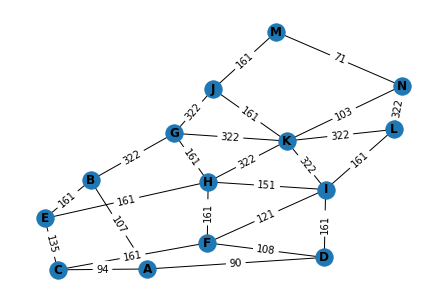

In [6]:
pos=nx.spring_layout(G)    # this command ensure spacing of the nodes so that they do not overlap each other
nx.draw(G, pos, with_labels=True, font_weight="bold") # this draws the graph to pyplot axis
edge_weight = nx.get_edge_attributes(G,"weight") # get edge attributes from the graph
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show() # displays graph

In [7]:
# DIJKSTAR'S AlGORITHM (DA) IMPLEMENTATION IN PYTHON

In [15]:
# Create directed graph of a nested dictionary with the nodes as the key.
# The nodes and their adjacent nodes as well as the weighted edges (vertex) form the nested dictionary of the graph
# Example: the adjacent nodes of node A are B, C, and D while the weighted edges of the adjacent nodes are 107, 94, and 90 respectively
graph = {
    "A": {"B": 107, "C": 94, "D": 90},       
    "B": {"A": 107, "E": 161, "G": 322},
    "C": {"A": 94, "E": 135, "F": 161},
    "D": {"A": 90, "F": 108, "I": 161},
    "E": {"B": 161, "C": 135, "H": 161},
    "F": {"C": 161, "D": 108, "I": 121, "H": 161},
    "G": {"B": 322, "H": 161, "J": 322},
    "H": {"E": 161, "G": 161, "H": 161, "K": 322},
    "I": {"D": 161, "F": 121, "L": 161, "K": 322},
    "J": {"G": 322, "K": 161, "M": 161},
    "K": {"H": 322, "I": 121, "J": 161, "L": 322, "N": 103},
    "L": {"I": 161, "K": 322, "N": 322},
    "M": {"J": 161, "N": 71},
    "N": {"M": 71, "K": 103, "L": 322}
} 



def dijkstra(graph, source, destination):  # create a function dijkstra with the variables source and destination as start goal nodes respectively
    shortest_distance = {}     # record the cost to reach the node which is going to be updated as we move along the graph
    track_predecessor = {}     # keep track of the path that has led us to this node
    unseen_nodes = graph       # to iterate through the entire graph
    infinity = 9999999         # infinity can basically be considered a very large number
    track_path = []            # trace our journey to the source node which is the optimal route

    for node in unseen_nodes:
        shortest_distance[node] = infinity  # assigning infinity to the cost to all other nodes except the start no which is zero since no distance
    shortest_distance[source] = 0

# looping through the entire graph, If the shortest distance node is found, move on to determine the optional paths from the minimum distance node
    while unseen_nodes:
        min_distance_node = None
        for node in unseen_nodes:
            if min_distance_node is None:
                min_distance_node = node
            elif shortest_distance[node] < shortest_distance[min_distance_node]:
                min_distance_node = node
        path_options = graph[min_distance_node].items()

# updating the cost of a particular node and establishing a more optimal if a much lower distance node than the former is found as looping progresses.
        for child_node, weight in path_options:
            if weight + shortest_distance[min_distance_node] < shortest_distance[child_node]:
                shortest_distance[child_node] = weight + shortest_distance[min_distance_node]
                track_predecessor[child_node] = min_distance_node
                
                
# pop out each of the nodes after it has been used so that we will not iterate through the nodes that has been visited
        unseen_nodes.pop(min_distance_node)
    current_node = destination

# Back track the route to ensure the current node is not equal the start node.

# display an exception error if there is no path between start and goal nodes. Else, update the current node to the predecessor node if there exist a path.

    while current_node != source:
        try:
            track_path.insert(0, current_node)
            current_node = track_predecessor[current_node]
        except KeyError:
            print("Path is not reachable")
            break
    track_path.insert(0, source)

# The optimal path is reached if the minimum distance is not equal to infinity
# If the cost remains infinity, it means we are yet to reach the path to the goal node.
    if shortest_distance[destination] != infinity:
        print("shortest distance is from", source, "to", destination, "is " + str(shortest_distance[destination]),"mtrs")
        print("Optimal path is " + str(track_path))
        
        # printing out optimal path of building names
        NodeNames = {"A":"Teesside University Central Halls", "B":"Constantine",
                     "C":"Stephenson", "D":"The Printworks", "E":"Orion", "F":"Phoenix",
                     "G":"Waterhouse", "H":"Aurora", "I":"Athena", "J":"The Curve", "K":"Student Union",
                     "L":"Europa", "M":"Centuria", "N":"Olympia"}
        
        for k in str(track_path):
            if k in NodeNames:
                print(NodeNames[k],"->", end="")
                

buildings = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]


def findOptimalPath():              # function to validate the source and destination location input fields
    
    start = input("Enter source location: ")
        
    if start in buildings:
        end = input("Enter destination location: ")
        if end in buildings:
            dijkstra(graph, start, end)
                
        else:
            print("Location does not exist")
            findOptimalPath()
    else:
        print("Location does not exist")
        findOptimalPath()        
findOptimalPath()

Enter source location: A
Enter destination location: N
shortest distance is from A to N is 676 mtrs
Optimal path is ['A', 'D', 'I', 'K', 'N']
Teesside University Central Halls ->The Printworks ->Athena ->Student Union ->Olympia ->